# **Stock Market Forecasting with ARIMA, SARIMA , SARIMAX | A complete Project A-Z**

#**Stock Market Data scraping in Python**


In [24]:
# import Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
#
# Import time series analysis tools from statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Get today's date
dt.date.today()

datetime.date(2025, 7, 11)

In [26]:
# define the dates to fetch data
today = dt.date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = dt.date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
# Print the date range for the data
print("Your data will be between these dates:",start_date, end_date)

Your data will be between these dates: 2024-07-11 2025-07-11


In [27]:
# define the ticker symbol for the stock
ticker = 'GOOGL' #DX-Y.NYB

# Download historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
# Display the first few rows of the DataFrame
display(df.head())

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-07-11,184.675415,189.939906,184.187772,188.934781,25625800
2024-07-12,184.177841,186.208000,183.600635,184.187788,22898400
2024-07-15,185.630768,187.332531,184.028529,184.028529,16474000
2024-07-16,183.033356,187.770403,182.486004,186.456775,18290700
2024-07-17,180.147339,182.665141,179.032728,182.087935,20734100


In [28]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-11 to 2025-07-10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   250 non-null    float64
 1   (High, GOOGL)    250 non-null    float64
 2   (Low, GOOGL)     250 non-null    float64
 3   (Open, GOOGL)    250 non-null    float64
 4   (Volume, GOOGL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [29]:
# # Insert the Date index as a new column (commented out)
# df.insert(0, 'Date', df.index, True)

In [30]:
# Add the Date index as a new column
df['Date'] = df.index
# Reset the index to a default integer index and drop the old index
df.reset_index(drop=True, inplace=True)

In [31]:
# Display information about the DataFrame after adding the Date column and resetting the index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Close, GOOGL)   250 non-null    float64       
 1   (High, GOOGL)    250 non-null    float64       
 2   (Low, GOOGL)     250 non-null    float64       
 3   (Open, GOOGL)    250 non-null    float64       
 4   (Volume, GOOGL)  250 non-null    int64         
 5   (Date, )         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [32]:
# Display the first few rows of the DataFrame after modifications
display(df.head())

Price,Close,High,Low,Open,Volume,Date
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
0,184.675415,189.939906,184.187772,188.934781,25625800,2024-07-11
1,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
2,185.630768,187.332531,184.028529,184.028529,16474000,2024-07-15
3,183.033356,187.770403,182.486004,186.456775,18290700,2024-07-16
4,180.147339,182.665141,179.032728,182.087935,20734100,2024-07-17


In [33]:
# Display the column names of the DataFrame
display(df.columns)

MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL'),
            (  'Date',      '')],
           names=['Price', 'Ticker'])

In [34]:
# Flatten the MultiIndex columns into single-level column names
df.columns = [''.join(col).strip() for col in df.columns.values]

In [35]:
# Display information about the DataFrame after flattening column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CloseGOOGL   250 non-null    float64       
 1   HighGOOGL    250 non-null    float64       
 2   LowGOOGL     250 non-null    float64       
 3   OpenGOOGL    250 non-null    float64       
 4   VolumeGOOGL  250 non-null    int64         
 5   Date         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [36]:
# Display the first few rows of the DataFrame after flattening column names
display(df.head())

,CloseGOOGL,HighGOOGL,LowGOOGL,OpenGOOGL,VolumeGOOGL,Date
0,184.675415,189.939906,184.187772,188.934781,25625800,2024-07-11
1,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
2,185.630768,187.332531,184.028529,184.028529,16474000,2024-07-15
3,183.033356,187.770403,182.486004,186.456775,18290700,2024-07-16
4,180.147339,182.665141,179.032728,182.087935,20734100,2024-07-17


In [37]:
# Select only the 'Date' and 'Close' columns
df = df[['Date','CloseGOOGL']]
# Display the first few rows of the filtered DataFrame
display(df.head())

,Date,CloseGOOGL
0,2024-07-11,184.675415
1,2024-07-12,184.177841
2,2024-07-15,185.630768
3,2024-07-16,183.033356
4,2024-07-17,180.147339


In [38]:
# Display the shape (number of rows and columns) of the DataFrame
display(df.shape)

(250, 2)

In [39]:
# Create a line plot of the 'CloseGOOGL' price over time using Plotly Express
fig = px.line(df, x='Date', y='CloseGOOGL', title='Time Series Data')
# Display the plot
# fig.show()

In [40]:
# Define a function to check for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    # Perform the ADF test
    result = adfuller(df)
    # Print the ADF statistic and p-value
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    # Check the p-value to determine stationarity
    if result[1] <= 0.05:
        print('Reject the null hypothesis. data is stationary')
    else:
        print('Fail to reject the null hypothesis.Data is not stationary')

In [41]:
# Check the stationarity of the 'CloseGOOGL' column using the defined function
check_stationarity(df['CloseGOOGL'])

ADF Statistic: -1.741622
p-value: 0.409805
Fail to reject the null hypothesis.Data is not stationary


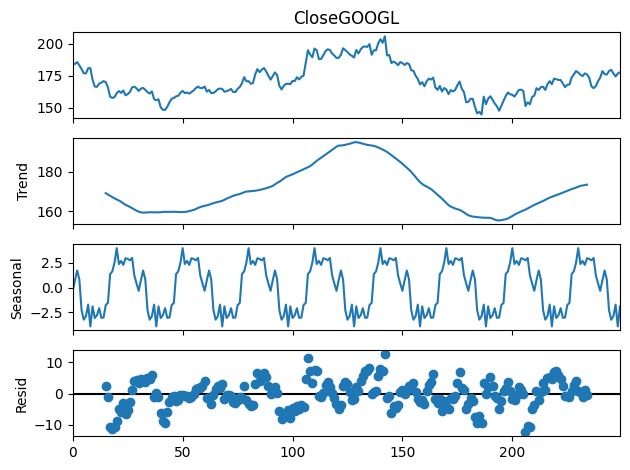

In [42]:
# Perform seasonal decomposition on the 'CloseGOOGL' column
from statsmodels.tsa.seasonal import seasonal_decompose
# Model='additive' assumes the components add up to the observed series.
# Period=30 assumes a seasonality of 30 days (e.g., monthly).
decompose = seasonal_decompose(df['CloseGOOGL'], model='additive', period=30)
# Plot the decomposed components (trend, seasonal, residual)
decompose.plot()
# Display the plot
plt.show()

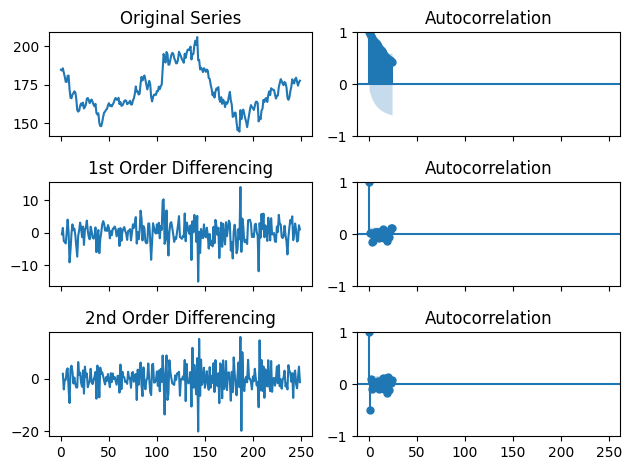

In [43]:
# Import functions for plotting autocorrelation and partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for displaying original series and differenced series with their ACF plots
fig, axes = plt.subplots(3, 2, sharex=True)

# Plot the original series and its ACF
axes[0, 0].plot(df['CloseGOOGL'])
axes[0, 0].set_title('Original Series')
plot_acf(df['CloseGOOGL'], ax=axes[0, 1])

# Plot the 1st order differenced series and its ACF
axes[1, 0].plot(df['CloseGOOGL'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['CloseGOOGL'].diff().dropna(), ax=axes[1, 1])

# Plot the 2nd order differenced series and its ACF
axes[2, 0].plot(df['CloseGOOGL'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['CloseGOOGL'].diff().diff().dropna(), ax=axes[2, 1])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
# Display the plots
plt.show()

In [44]:
# Calculate the 1st order differencing of the 'CloseGOOGL' column
df['CloseGOOGL_diff'] = df['CloseGOOGL'].diff()
# Display the first few rows of the DataFrame with the new differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff
0,2024-07-11,184.675415,NaN
1,2024-07-12,184.177841,-0.497574
2,2024-07-15,185.630768,1.452927
3,2024-07-16,183.033356,-2.597412
4,2024-07-17,180.147339,-2.886017


In [45]:
# Check the stationarity of the 1st order differenced 'CloseGOOGL' column
check_stationarity(df['CloseGOOGL_diff'].dropna())

ADF Statistic: -9.719105
p-value: 0.000000
Reject the null hypothesis. data is stationary


In [46]:
# Calculate the 2nd order differencing of the 'CloseGOOGL' column
df['CloseGOOGL_diff2'] = df['CloseGOOGL'].diff().diff()
# Display the first few rows of the DataFrame with the new 2nd order differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff,CloseGOOGL_diff2
0,2024-07-11,184.675415,NaN,NaN
1,2024-07-12,184.177841,-0.497574,NaN
2,2024-07-15,185.630768,1.452927,1.950500
3,2024-07-16,183.033356,-2.597412,-4.050339
4,2024-07-17,180.147339,-2.886017,-0.288605


d=1

#**Lets find p value**

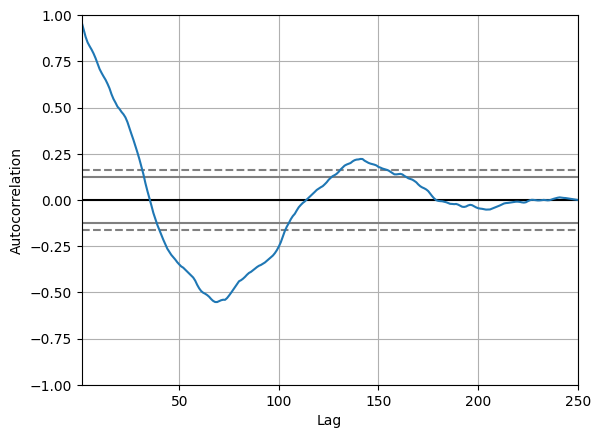

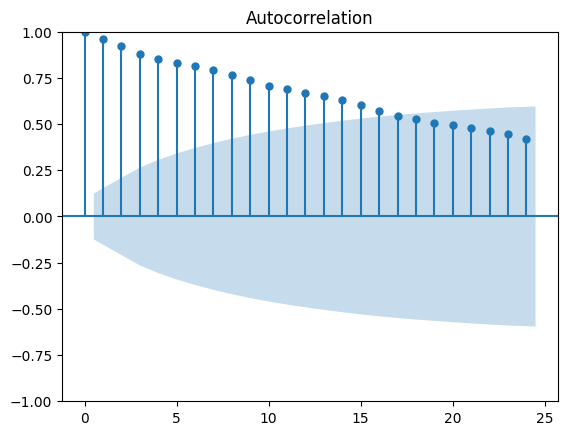

           0
0   1.000000
1   0.962109
2   0.922939
3   0.881895
4   0.851944
5   0.831802
6   0.813218
7   0.791848
8   0.766526
9   0.737210
10  0.708397
11  0.687403
12  0.668092
13  0.650233
14  0.628106
15  0.603278
16  0.571544
17  0.545755
18  0.526086
19  0.504600
20  0.492311
21  0.476289
22  0.463389
23  0.446222


In [47]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['CloseGOOGL'])

plot_acf(df['CloseGOOGL'], alpha=0.05)

# plot_pacf(df['CloseGOOGL'])
plt.show()

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['CloseGOOGL']))
print(x_acf)

**P=2**

# **Lets find q value**

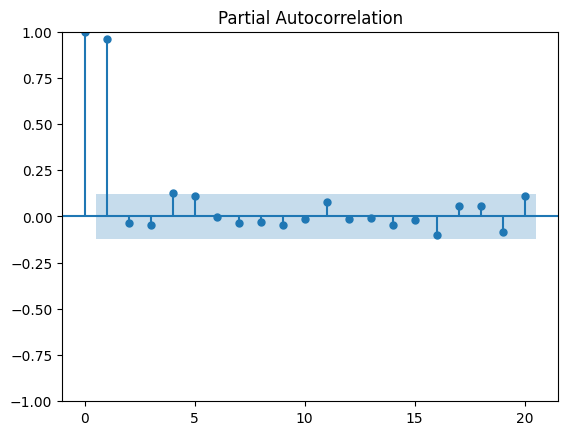

In [48]:
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['CloseGOOGL'],lags=20, alpha=0.05)
plt.show()

In [49]:
p = 2
d = 1
q = 2

In [ ]:
!pip install pmdarima

In [55]:


from pmdarima.arima import auto_arima

model = auto_arima(df['CloseGOOGL'], start_p=1, start_q=1, max_p=2, max_q=2, m = 12, start_P=0, seasonal=True, d=1, D=1, trace= True, error_action='ignore', suppress_warnings=True )



c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1301.468, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1432.046, Time=0.05 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1340.707, Time=0.19 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1299.514, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1434.017, Time=0.08 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1299.568, Time=0.59 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1299.944, Time=1.38 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1340.725, Time=0.28 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1299.524, Time=2.85 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1297.656, Time=0.23 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1297.784, Time=0.36 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1298.164, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1339.221, Time=0.12 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1297.636, Time=1.51 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1299.590, Time=3.30 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.48 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1299.514, Time=3.20 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1301.482, Time=3.85 sec


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=1299.246, Time=2.16 sec

Best model:  ARIMA(0,1,0)(1,1,2)[12]          
Total fit time: 23.479 seconds


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -644.818
Date:                                 Fri, 11 Jul 2025   AIC                           1297.636
Time:                                         22:30:43   BIC                           1311.508
Sample:                                              0   HQIC                          1303.227
                                                 - 250                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8636      0.178     -4.844      0.000      -1.213      -0.514
ma.S.L12      -0.0626      0.212     -0.295      0.768      -0.478       0.353
ma.S.L24      -0.6844      0.202     -3.384      0.001      -1.081      -0.288
sigma2        12.5543      0.864     14.525      0.000      10.860      14.248
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                54.80
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model = auto_arima(df['CloseGOOGL'], seasonal=True, suppress_warnings=True)


c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\envs\streamlit\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hp\anaconda3\env

In [58]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -661.986
Date:                Fri, 11 Jul 2025   AIC                           1329.971
Time:                        22:30:59   BIC                           1340.536
Sample:                             0   HQIC                          1334.223
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2961      2.346      2.684      0.007       1.698      10.894
ar.L1          0.9636      0.014     71.161      0.000       0.937       0.990
sigma2        11.5587      0.744     15.540      0.0

In [59]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 2, 1, 2

model = ARIMA(df['CloseGOOGL'], order=(p, d, q))
model = model.fit()


In [60]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             CloseGOOGL   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.046
Date:                Fri, 11 Jul 2025   AIC                           1322.093
Time:                        22:31:12   BIC                           1339.680
Sample:                             0   HQIC                          1329.172
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3770      0.040     34.827      0.000       1.300       1.455
ar.L2         -0.9609      0.042    -22.711      0.000      -1.044      -0.878
ma.L1         -1.3814      0.051    -27.325      0.0

                               SARIMAX Results                                
Dep. Variable:             CloseGOOGL   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.046
Date:                Fri, 11 Jul 2025   AIC                           1322.093
Time:                        22:40:41   BIC                           1339.680
Sample:                             0   HQIC                          1329.172
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3770      0.040     34.827      0.000       1.300       1.455
ar.L2         -0.9609      0.042    -22.711      0.000      -1.044      -0.878
ma.L1         -1.3814      0.051    -27.325      0.0

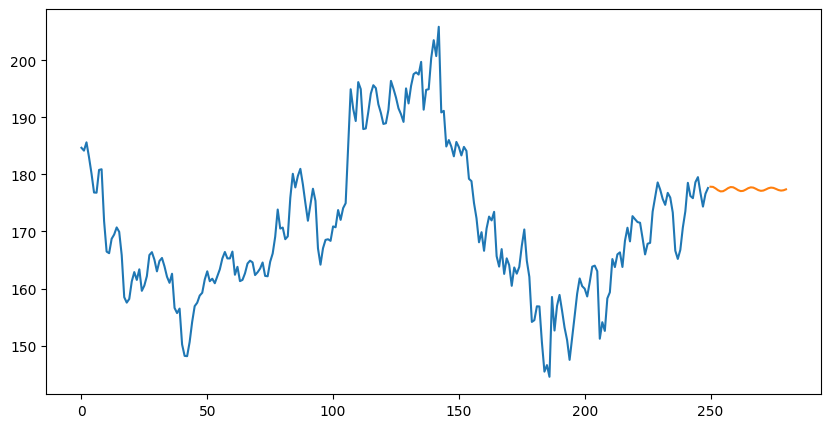

In [63]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 2, 1, 2

model = ARIMA(df['CloseGOOGL'], order=(p, d, q))
model = model.fit()

print(model.summary())

forecast = model.predict(len(df['CloseGOOGL']), len(df['CloseGOOGL']) +30)
# print(forecast)


plt.figure(figsize=(10, 5))
plt.plot(df['CloseGOOGL'], label='Actual')
plt.plot(forecast, label='Forecast')
